In [82]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

# Part 1:
## Organize and configure data for this notebook

In [83]:
# financial data
DJI_df = pd.read_csv('^DJI.csv')[['Date', 'Adj Close']]
TNX_df = pd.read_csv('^TNX.csv')[['Date', 'Adj Close']]
unemployment_df = pd.read_csv('unemployment.csv')

# educational data
gr_en_df = pd.read_csv('graduationAndEnrollment.csv', index_col=0)
rank_df = pd.read_csv('schools_ranking.csv', index_col=0).drop(['name'], axis=1)
sfa_df = pd.read_csv('student_financial_aid.csv', index_col=0)
uni_finance_df = pd.read_csv('university_financial.csv', index_col=0)

usa_gdf = gpd.read_file("gz_2010_us_040_00_20m.json")
uni_gdf = gpd.read_file("uni_geo_location.geojson")

edu_df = pd.merge(gr_en_df,rank_df, left_on='UNITID', right_on='UNITID', how='left')
# add rank 181, if not included in the top 180 ranking
edu_df['Rank'] = edu_df['Rank'].fillna(181)
edu_df = pd.merge(edu_df,sfa_df.drop('TYPE', axis=1), left_on='UNITID', right_on='UNITID', how='inner')
edu_df = pd.merge(edu_df,uni_finance_df.drop('TYPE', axis=1), left_on='UNITID', right_on='UNITID', how='inner')

edu_change_df = pd.read_csv('percentage_change_all_vars.csv', index_col=0)



In [84]:
# make graduation and enrollment columns follow same nameing 
# convention as other columns
cols = edu_df.columns.tolist()
for i in range(len(cols)):
    if cols[i][0] == 'g':
        endYear = cols[i][-2:]
        beginingYear = str(int(endYear)-1).zfill(2)
        cols[i] = beginingYear + endYear + '_' + 'GR'
    elif cols[i][0] == 'e':
        endYear = cols[i][-2:]
        beginingYear = str(int(endYear)-1).zfill(2)
        cols[i] = beginingYear + endYear + '_' + 'EN'
edu_df.columns = cols


In [85]:
#Drop rows with missing data
edu_df = edu_df.dropna(how='any') 
edu_change_df = edu_change_df.dropna(how='any') 

In [86]:
list_all_uni = pd.merge(edu_df[['UNITID']], edu_change_df[['UNITID']], left_on='UNITID', right_on='UNITID', how='inner' )

In [87]:
edu_df = pd.merge(edu_df,list_all_uni, left_on='UNITID', right_on='UNITID', how='inner')
edu_change_df = pd.merge(edu_change_df,list_all_uni, left_on='UNITID', right_on='UNITID', how='inner')


# ----------------------------------------------------

# Part2:
## initial exploritory analysis

datasets available:

edu_df

edu_change_df

uni_gdf

usa_gdf

DJI_df

TNX_df

unemployment_df

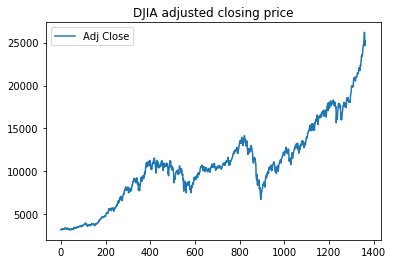

In [95]:
DJI_df.plot(title="DJIA adjusted closing price")

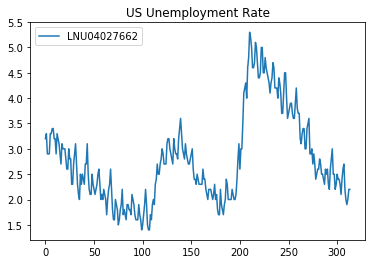

In [96]:
unemployment_df.plot(title="US Unemployment Rate")